# Сферичні гармоніки та p-орбіталі в квантовій хімії

У квантовій механіці хвильова функція атомних орбіталей для воднеподібних атомів описується за допомогою **сферичних гармонік** $Y_l^m(\theta, \phi)$, які є частиною кутової залежності. Радіальна частина задається функцією $R_{n l}(r)$, але в цьому прикладі ми фокусуємося на кутовій частині для p-орбіталей ($l = 1$).

Сферичні гармоніки для $l = 1$ та магнітних квантових чисел $m = -1, 0, +1$ визначаються як:

$$
Y_{1}^{-1}(\theta, \phi) = \sqrt{\frac{3}{8\pi}} \sin\theta \, e^{i\phi}
$$

$$
Y_{1}^{0}(\theta, \phi) = \sqrt{\frac{3}{4\pi}} \cos\theta
$$

$$
Y_{1}^{1}(\theta, \phi) = -\sqrt{\frac{3}{8\pi}} \sin\theta \, e^{-i\phi}
$$

(Зверніть увагу, що в коді використовуються нормалізовані форми з `sympy`, які можуть відрізнятися знаком або множником, але еквівалентні.)

Реальні p-орбіталі ($p_x$, $p_y$, $p_z$) є лінійними комбінаціями комплексних сферичних гармонік для зручності в хімії та візуалізації:

$$
p_x = \frac{1}{\sqrt{2}} \left( Y_{1}^{-1} - Y_{1}^{1} \right)
$$

$$
p_y = \frac{i}{\sqrt{2}} \left( Y_{1}^{-1} + Y_{1}^{1} \right)
$$

$$
p_z = Y_{1}^{0}
$$

Після спрощення з використанням тригонометричних тотожностей (наприклад, $e^{i\phi} + e^{-i\phi} = 2\cos\phi$), отримуємо реальні функції:

$$
p_x(\theta, \phi) = \sqrt{\frac{3}{4\pi}} \sin\theta \cos\phi
$$

$$
p_y(\theta, \phi) = \sqrt{\frac{3}{4\pi}} \sin\theta \sin\phi
$$

$$
p_z(\theta, \phi) = \sqrt{\frac{3}{4\pi}} \cos\theta
$$

Ці функції візуалізуються в сферичних координатах, де радіус пропорційний $|p(\theta, \phi)|$, а колір вказує на знак (червоний для додатного, синій для від’ємного). Перетворення до декартових координат:

$$
x = |p| \sin\theta \cos\phi, \quad y = |p| \sin\theta \sin\phi, \quad z = |p| \cos\theta
$$

Графік показує форму гантелі, характерну для p-орбіталей. Повна хвильова функція для 2p-орбіталі включає радіальну частину $R_{nl}(r)$.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sympy import *
from sympy.abc import Z, phi, r, theta
from sympy.physics.hydrogen import R_nl, Ynm

In [2]:
Ynm(1, -1, theta, phi).expand(func=True)

sqrt(6)*exp(-I*phi)*sin(theta)/(4*sqrt(pi))

In [3]:
Ynm(1, +1, theta, phi).expand(func=True)

-sqrt(6)*exp(I*phi)*sin(theta)/(4*sqrt(pi))

In [11]:
px = ( 1 / sqrt(2) * ( Ynm(1, -1, theta, phi).expand(func=True) - Ynm(1, +1, theta, phi).expand(func=True) ) )
py = ( I / sqrt(2) * ( Ynm(1, -1, theta, phi).expand(func=True) + Ynm(1, +1, theta, phi).expand(func=True) ) )
pz = Ynm(1, 0, theta, phi).expand(func=True)
trigsimp(px)

sqrt(3)*(exp(I*phi) + exp(-I*phi))*sin(theta)/(4*sqrt(pi))

In [12]:
x, y, z, r = symbols("x y z r")

In [13]:
px = trigsimp(px).subs(exp(I * phi) + exp(-I * phi), 2 * cos(phi))
px

sqrt(3)*sin(theta)*cos(phi)/(2*sqrt(pi))

In [14]:
py = trigsimp(py).subs(exp(I * phi) - exp(-I * phi), 2 * I * sin(phi))
py

sqrt(3)*sin(phi)*sin(theta)/(2*sqrt(pi))

In [15]:
theta_vals = np.linspace(0, np.pi, 50)
phi_vals = np.linspace(0, 2 * np.pi, 50)
Theta, Phi = np.meshgrid(theta_vals, phi_vals)

In [16]:
px_func = lambdify((theta, phi), px, "numpy")
py_func = lambdify((theta, phi), py, "numpy")
pz_func = lambdify((theta, phi), pz, "numpy")
px_func_vals = px_func(Theta, Phi)
py_func_vals = py_func(Theta, Phi)
pz_func_vals = pz_func(Theta, Phi)

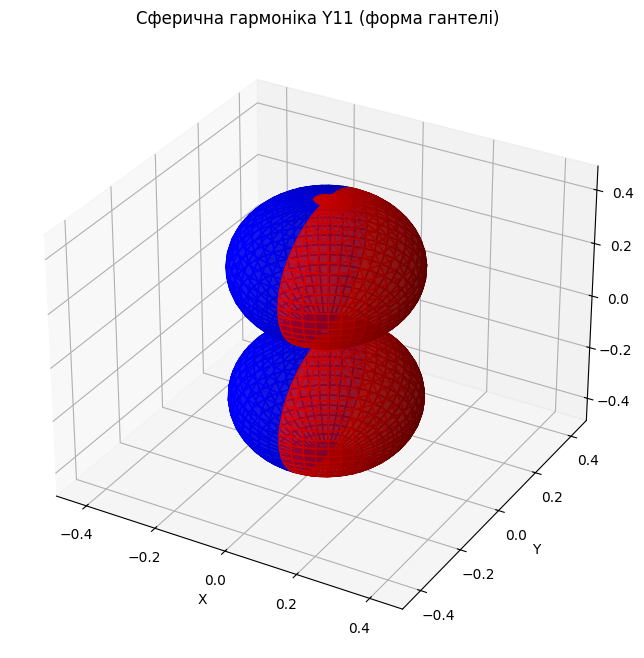

In [19]:
# Перетворюємо в декартові координати
# Радіус = абсолютне значення функції

PxX = np.abs(px_func_vals) * np.sin(Theta) * np.cos(Phi)
PxY = np.abs(px_func_vals) * np.sin(Theta) * np.sin(Phi)
PxZ = np.abs(px_func_vals) * np.cos(Theta)

PyX = np.abs(py_func_vals) * np.sin(Theta) * np.cos(Phi)
PyY = np.abs(py_func_vals) * np.sin(Theta) * np.sin(Phi)
PyZ = np.abs(py_func_vals) * np.cos(Theta)

PzX = np.abs(pz_func_vals) * np.sin(Theta) * np.cos(Phi)
PzY = np.abs(pz_func_vals) * np.sin(Theta) * np.sin(Phi)
PzZ = np.abs(pz_func_vals) * np.cos(Theta)

# Створюємо графік
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

# Колір залежить від знака функції (+ червоний, - синій)
colors = np.where(px_func_vals >= 0, "red", "blue")
# ax.plot_surface(PxX, PxY, PxZ, facecolors=colors, alpha=0.7)
# ax.plot_surface(PyX, PyY, PyZ, facecolors=colors, alpha=0.7)
ax.plot_surface(PzX, PzY, PzZ, facecolors=colors, alpha=0.7)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Сферична гармоніка Y11 (форма гантелі)")

# Однакові масштаби по всіх осях
max_range = np.max([PxX.max(), PyY.max(), PzZ.max()])
ax.set_xlim([-max_range, max_range])
ax.set_ylim([-max_range, max_range])
ax.set_zlim([-max_range, max_range])

plt.show()